# Analyse des Données du DELF : Inscriptions, Présences et Admissions
le DELF (Diplôme d'Études en Langue Française) est une certification officelle  reconnue internationalement qui valide les compéténces en lanque francaise pour les non-francophones . il est structuré en Niveaux (A1 à C2) et évalue l'expression orale et écrit , anisi que la compréhension orale et écrite

Le fichier contient des données sur le DELF : inscription , présences , admission par Pays , Ville , centre , Niveau , année et codes ISO/géographiques.


## Charger et Explorer les Donées 

#### Utilisation de Codes Simples et Résolution d'Encodage avec ChatGPT

Nous n'avons pas utilisé de package spécifique pour exploiter les données. Chaque fois que j'essayais de charger un package ou d'utiliser la fonction library, une erreur apparaissait. C'est pourquoi nous avons utilisé des codes simples provenant du code de base.

De plus, nous avons utilisé ChatGPT pour résoudre un problème lié à l'encodage du fichier. En effet, lors de l'affichage du tableau, des caractères étranges comme #@$#$ apparaissaient avant le mot "pays". Je n'ai pas pu résoudre ce problème jusqu'à ce que ChatGPT me suggère d'utiliser fileEncoding = "UTF-8-BOM", ce qui a corrigé l'affichage du fichier.

**Charger le fichier**

Ici, nous chargeons notre fichier de données qui contient les informations à analyser.

Pour exploiter un fichier Excel en langage R, le package readxl est une solution efficace offrant des fonctions adaptées à cette tâche. Avant de l'utiliser, il est essentiel de vérifier s'il est installé et, le cas échéant, procéder à son installation :

In [1]:
data <- read.csv("delf.csv", sep = ";", header = TRUE, fileEncoding = "UTF-8-BOM")

head(data)

Pays,Ville,Centre,Declinaison,Niveau,Annee,Inscrits,Presents,Admis,ISO_pays,COG_pays
Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF scolaire/junior,B1,2023,1,1,1,MEX,99405
Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF-DALF tout public,A1,2023,1,1,1,MEX,99405
Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF-DALF tout public,B1,2023,14,13,10,MEX,99405
France,Cayenne Cedex,"Centre pénitentiaire de Guyane, Unité locale d'enseignement",DELF-DALF tout public,A1,2023,6,6,6,FRA,99100
France,Cayenne Cedex,"Centre pénitentiaire de Guyane, Unité locale d'enseignement",DELF-DALF tout public,A2,2023,10,10,10,FRA,99100
France,Fresnes,"Centre Pénitentiaire des Hauts de Seine, Nanterre",DELF-DALF tout public,A1,2023,8,7,7,FRA,99100


## Nettoyage des données 
Nous avons supprimé les colonnes "ISO_pays", "COG_pays" et "Annee" de l'ensemble de données, car l'année est déjà fixée à 2023 et le code des pays n'apporte pas d'information significative pour notre analyse.

In [2]:
data <- subset(data, select = -c(ISO_pays, COG_pays, Annee))

head(data)


Pays,Ville,Centre,Declinaison,Niveau,Inscrits,Presents,Admis
Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF scolaire/junior,B1,1,1,1
Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF-DALF tout public,A1,1,1,1
Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF-DALF tout public,B1,14,13,10
France,Cayenne Cedex,"Centre pénitentiaire de Guyane, Unité locale d'enseignement",DELF-DALF tout public,A1,6,6,6
France,Cayenne Cedex,"Centre pénitentiaire de Guyane, Unité locale d'enseignement",DELF-DALF tout public,A2,10,10,10
France,Fresnes,"Centre Pénitentiaire des Hauts de Seine, Nanterre",DELF-DALF tout public,A1,8,7,7


Comme nous pouvons le voir, nous avons huit colonnes, mais nous ne pouvons pas connaître le nombre de lignes. C'est pourquoi nous allons maintenant déterminer le nombre de lignes avec l'équation suivante

In [3]:
nrow(data)  # Renvoie le nombre de lignes


[1] 7573

Nous avons utilisé la fonction summary() pour générer un résumé statistique des données après avoir supprimé les colonnes non pertinentes. Cela nous a permis d'obtenir une vue d'ensemble des principales caractéristiques statistiques des variables restantes, telles que les valeurs minimales, maximales, la moyenne et l'écart-type

In [4]:
summary(data)


                   Pays                   Ville     
 France              : 703   Ciudad De México:  61  
 Mexique             : 460   Lyon            :  40  
 Espagne             : 394   Marseille       :  33  
 Grèce               : 394   Madrid          :  32  
 Fédération de Russie: 271   Buenos Aires    :  29  
 Italie              : 271   Jakarta         :  29  
 (Other)             :5080   (Other)         :7349  
                            Centre                    Declinaison    Niveau    
 Alliance française            :  17   DELF-DALF tout public:3956   A1  :1548  
 Alliance française d'Auckland :  17   DELF Prim            : 859   A1.1: 248  
 Alliance française de Dublin  :  17   DELF scolaire/junior :2758   A2  :1709  
 Alliance française de Lisbonne:  17                                B1  :1537  
 Alliance Française Torino     :  17                                B2  :1469  
 Institut français             :  17                                C1  : 625  
 (Other)        

**Compter le nombre de valeus uniques par colonnes**

In [5]:
# Compter le nombre de valeurs uniques par colonne
valeurs_uniques <- sapply(data, function(x) length(unique(x)))

# Afficher le résultat
print(valeurs_uniques)

       Pays       Ville      Centre Declinaison      Niveau    Inscrits 
        161         941        1077           3           7         557 
   Presents       Admis 
        536         497 


## Ajouter des colonnes : Taux_admission , Abscent , Non Admis , Taux Non Admis 
Nous avons ajouté quatre colonnes : Taux_admission pour le pourcentage des admis, Absents pour le nombre d'inscrits absents, Non Admis pour les présents non admis, et Taux Non Admis pour leur pourcentage. Ces ajouts rendent l'analyse plus complète.

In [6]:
# Ajouter la colonne Non_Admis
data["Non_Admis"] <- data["Presents"] - data["Admis"]

# Ajouter la colonne Absents
data["Absents"] <- data["Inscrits"] - data["Presents"]

# Ajouter la colonne Taux_admission
data["Taux_admission"] <- (data["Admis"] / data["Presents"]) * 100


# Ajouter la colonne Taux_Non_Admis
data["Taux_Non_Admis"] <- (data["Non_Admis"] / data["Presents"]) * 100

# Afficher les premières lignes pour vérifier
head(data)

Pays,Ville,Centre,Declinaison,Niveau,Inscrits,Presents,Admis,Non_Admis,Absents,Taux_admission,Taux_Non_Admis
Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF scolaire/junior,B1,1,1,1,0,0,100.00000,0.00000
Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF-DALF tout public,A1,1,1,1,0,0,100.00000,0.00000
Mexique,Juárez,"Alianza Francesa de Cd Juárez, A.C",DELF-DALF tout public,B1,14,13,10,3,1,76.92308,23.07692
France,Cayenne Cedex,"Centre pénitentiaire de Guyane, Unité locale d'enseignement",DELF-DALF tout public,A1,6,6,6,0,0,100.00000,0.00000
France,Cayenne Cedex,"Centre pénitentiaire de Guyane, Unité locale d'enseignement",DELF-DALF tout public,A2,10,10,10,0,0,100.00000,0.00000
France,Fresnes,"Centre Pénitentiaire des Hauts de Seine, Nanterre",DELF-DALF tout public,A1,8,7,7,0,1,100.00000,0.00000


**Générer un résumé statistique du dataframe**

In [7]:

summary(data)

                   Pays                   Ville     
 France              : 703   Ciudad De México:  61  
 Mexique             : 460   Lyon            :  40  
 Espagne             : 394   Marseille       :  33  
 Grèce               : 394   Madrid          :  32  
 Fédération de Russie: 271   Buenos Aires    :  29  
 Italie              : 271   Jakarta         :  29  
 (Other)             :5080   (Other)         :7349  
                            Centre                    Declinaison    Niveau    
 Alliance française            :  17   DELF-DALF tout public:3956   A1  :1548  
 Alliance française d'Auckland :  17   DELF Prim            : 859   A1.1: 248  
 Alliance française de Dublin  :  17   DELF scolaire/junior :2758   A2  :1709  
 Alliance française de Lisbonne:  17                                B1  :1537  
 Alliance Française Torino     :  17                                B2  :1469  
 Institut français             :  17                                C1  : 625  
 (Other)        

## Analyse des Performances par Niveau : Inscrits , Présents, Admis , Non Admis , Taux_admission, Taux Non Admis  

Dans cette étape, nous analysons les performances par niveau en regroupant les données et en calculant plusieurs indicateurs clés : le nombre d'inscrits, de présents, d'absents, d'admis, et de non admis ainsi que les taux d'admission et de non-admission.

Cette approche permet de présenter les données sous forme de tableaux organisés et faciles à comprendre. Bien que cela semble un peu technique, ces tableaux nous donnent une vue d’ensemble claire des résultats par niveau. Ils serviront ensuite de base pour des visualisations graphiques qui rendront les tendances encore plus évidentes.

In [8]:
# Calculer le nombre d'inscriptions par niveau
niveau_counts <- aggregate(Inscrits ~ Niveau, data, sum)

# Trier les résultats par ordre décroissant
niveau_counts <- niveau_counts[order(-niveau_counts$Inscrits), ]

# Afficher les résultats avec un titre en gras
cat("\033[1mNombre d'inscriptions par niveau :\033[0m\n")
print(niveau_counts)

Nombre d'inscriptions par niveau :
  Niveau Inscrits
4     B1   127389
3     A2   121298
5     B2   101115
1     A1    93973
6     C1    24083
2   A1.1    12370
7     C2     8966


In [9]:
# Calculer le nombre de présents par niveau
presents_par_niveau <- aggregate(Presents ~ Niveau, data, sum)

# Trier les résultats par ordre croissant
presents_par_niveau <- presents_par_niveau[order(presents_par_niveau$Presents), ]

# Afficher les résultats avec un titre en gras
cat("\033[1mNombre de présents par niveau :\033[0m\n")
print(presents_par_niveau)

Nombre de présents par niveau :
  Niveau Presents
7     C2     8459
2   A1.1    11820
6     C1    22656
1     A1    88459
5     B2    97204
3     A2   115524
4     B1   122519


In [10]:
# Calculer le nombre d'absents par niveau
absents_par_niveau <- aggregate(Absents ~ Niveau, data, sum)

# Trier les résultats par ordre croissant
absents_par_niveau <- absents_par_niveau[order(absents_par_niveau$Absents), ]

# Afficher les résultats avec un titre en gras
cat("\033[1mNombre d'absents par niveau :\033[0m\n")
print(absents_par_niveau)

Nombre d'absents par niveau :
  Niveau Absents
7     C2     507
2   A1.1     550
6     C1    1427
5     B2    3911
4     B1    4870
1     A1    5514
3     A2    5774


In [11]:
# Calculer le nombre d'admis par niveau
admis_par_niveau <- aggregate(Admis ~ Niveau, data, sum)

# Trier les résultats par ordre décroissant
admis_par_niveau <- admis_par_niveau[order(-admis_par_niveau$Admis), ]

# Afficher les résultats avec un titre en gras
cat("\033[1mNombre d'admis par niveau :\033[0m\n")
print(admis_par_niveau)

Nombre d'admis par niveau :
  Niveau  Admis
3     A2 102364
4     B1 102155
1     A1  81237
5     B2  73954
6     C1  15854
2   A1.1  11086
7     C2   5613


In [12]:
# Calculer le nombre d'admis et de présents par niveau
admis_par_niveau <- aggregate(Admis ~ Niveau, data, sum)
presents_par_niveau <- aggregate(Presents ~ Niveau, data, sum)

# Fusionner les deux dataframes par niveau
taux_admission_df <- merge(admis_par_niveau, presents_par_niveau, by = "Niveau")

# Calculer le taux d'admission
taux_admission_df$Taux_admission <- (taux_admission_df$Admis / taux_admission_df$Presents) * 100

# Trier les résultats par ordre décroissant
taux_admission_df <- taux_admission_df[order(-taux_admission_df$Taux_admission), ]

# Afficher les résultats avec un titre en gras
cat("\033[1mTaux d'admission par niveau :\033[0m\n")
print(taux_admission_df[, c("Niveau", "Taux_admission")])

Taux d'admission par niveau :
  Niveau Taux_admission
2   A1.1       93.79019
1     A1       91.83577
3     A2       88.60843
4     B1       83.37890
5     B2       76.08123
6     C1       69.97705
7     C2       66.35536


In [13]:
# Calculer le nombre de non-admis par niveau
non_admis_par_niveau <- aggregate(Non_Admis ~ Niveau, data, sum)

# Trier les résultats par ordre décroissant
non_admis_par_niveau <- non_admis_par_niveau[order(-non_admis_par_niveau$Non_Admis), ]

# Afficher les résultats avec un titre en gras
cat("\033[1mNombre de non-admis par niveau :\033[0m\n")
print(non_admis_par_niveau)

Nombre de non-admis par niveau :
  Niveau Non_Admis
5     B2     23178
4     B1     20326
3     A2     13132
1     A1      7218
6     C1      6753
7     C2      2706
2   A1.1       712


In [14]:
# Calculer le nombre de non admis par niveau
non_admis_par_niveau <- aggregate(Non_Admis ~ Niveau, data, sum)

# Fusionner avec le dataframe des présents par niveau
taux_nonAdmis_df <- merge(non_admis_par_niveau, presents_par_niveau, by = "Niveau")

# Calculer le taux de non admis
taux_nonAdmis_df$Taux_Non_Admis <- (taux_nonAdmis_df$Non_Admis / taux_nonAdmis_df$Presents) * 100

# Trier les résultats par ordre décroissant
taux_nonAdmis_df <- taux_nonAdmis_df[order(-taux_nonAdmis_df$Taux_Non_Admis), ]

# Afficher les résultats avec un titre en gras
cat("\033[1mTaux de Non Admis par niveau :\033[0m\n")
print(taux_nonAdmis_df[, c("Niveau", "Taux_Non_Admis")])

Taux de Non Admis par niveau :
  Niveau Taux_Non_Admis
7     C2      31.989597
6     C1      29.806674
5     B2      23.844698
4     B1      16.590080
3     A2      11.367335
1     A1       8.159712
2   A1.1       6.023689


## forme de  graphique en barres

Visualisation du nombre d'inscriptions par niveau

[1] "Ce graphique en barres présente la distribution du nombre d'inscriptions par niveau, avec les niveaux allant de A1 à C2, et permet d'identifier la répartition des candidats en fonction de leur niveau de compétence en langue française. Les barres, colorées en bleu ciel, illustrent clairement la variation du nombre d'inscrits pour chaque niveau."


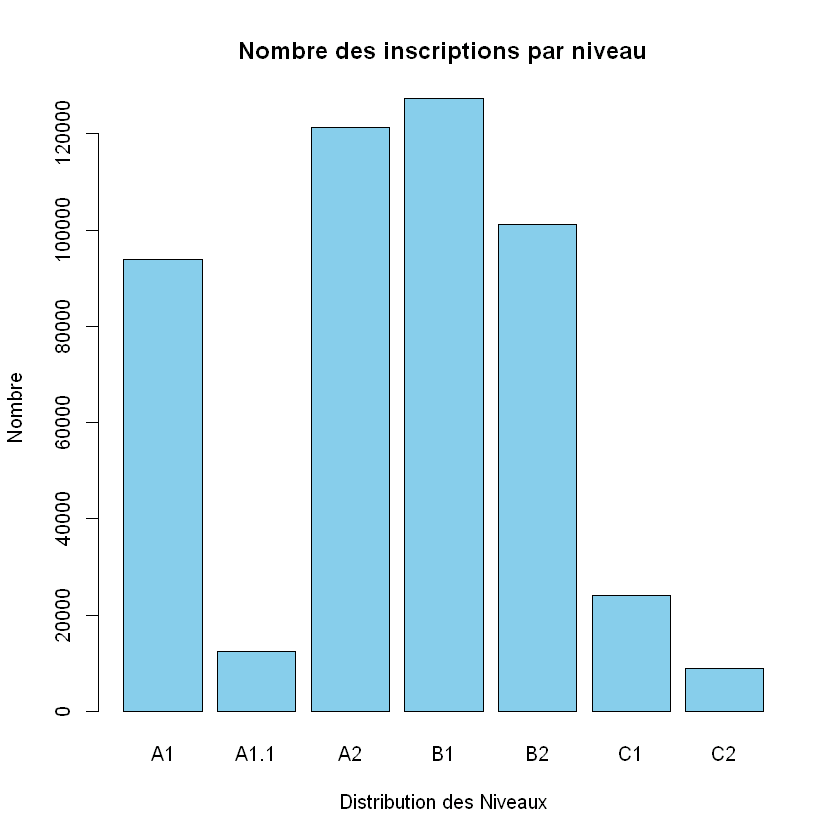

In [15]:
# Convertir la colonne "Niveau" en facteur avec un ordre spécifique
niveau_counts$Niveau <- factor(niveau_counts$Niveau, 
                              levels = c("A1", "A1.1", "A2", "B1", "B2", "C1", "C2"))

# Trier les données par niveau
niveau_counts <- niveau_counts[order(niveau_counts$Niveau), ]

# Tracer un diagramme en barres
barplot(niveau_counts$Inscrits, 
        names.arg = niveau_counts$Niveau,  # Étiquettes des barres
        col = "skyblue",                   # Couleur des barres
        main = "Nombre des inscriptions par niveau",  # Titre
        xlab = "Distribution des Niveaux",            # Titre de l'axe X
        ylab = "Nombre")                              # Titre de l'axe Y
print ("Ce graphique en barres présente la distribution du nombre d'inscriptions par niveau, avec les niveaux allant de A1 à C2, et permet d'identifier la répartition des candidats en fonction de leur niveau de compétence en langue française. Les barres, colorées en bleu ciel, illustrent clairement la variation du nombre d'inscrits pour chaque niveau.")

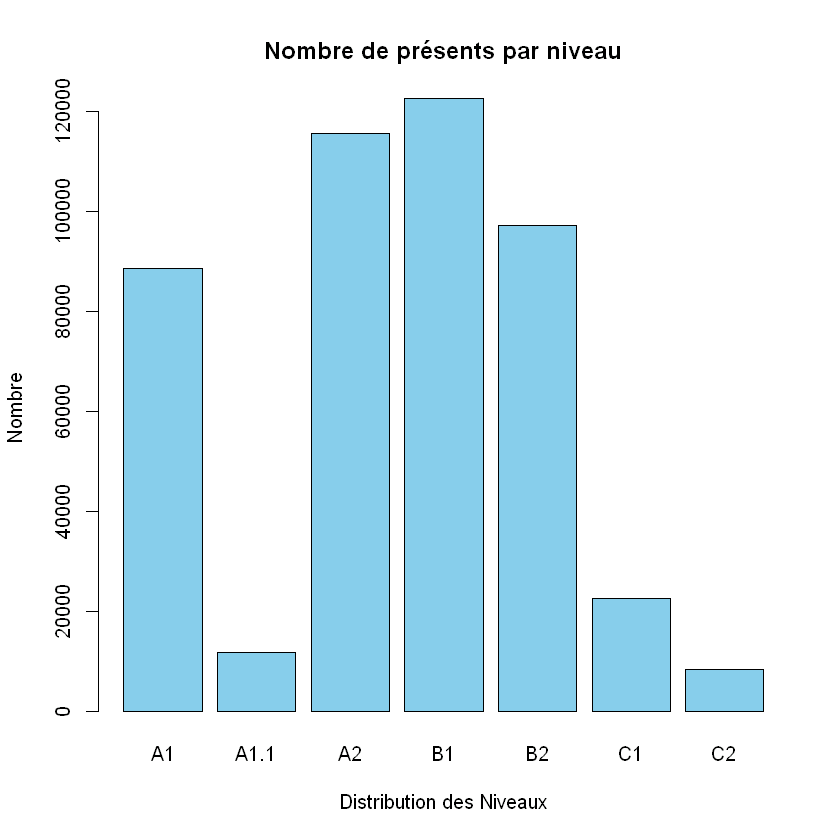

In [16]:
# Tracer un diagramme en barres
barplot(presents_par_niveau$Presents, 
        names.arg = presents_par_niveau$Niveau,  # Étiquettes des barres
        col = "skyblue",                         # Couleur des barres
        main = "Nombre de présents par niveau",   # Titre
        xlab = "Distribution des Niveaux",       # Titre de l'axe X
        ylab = "Nombre")                         # Titre de l'axe Y

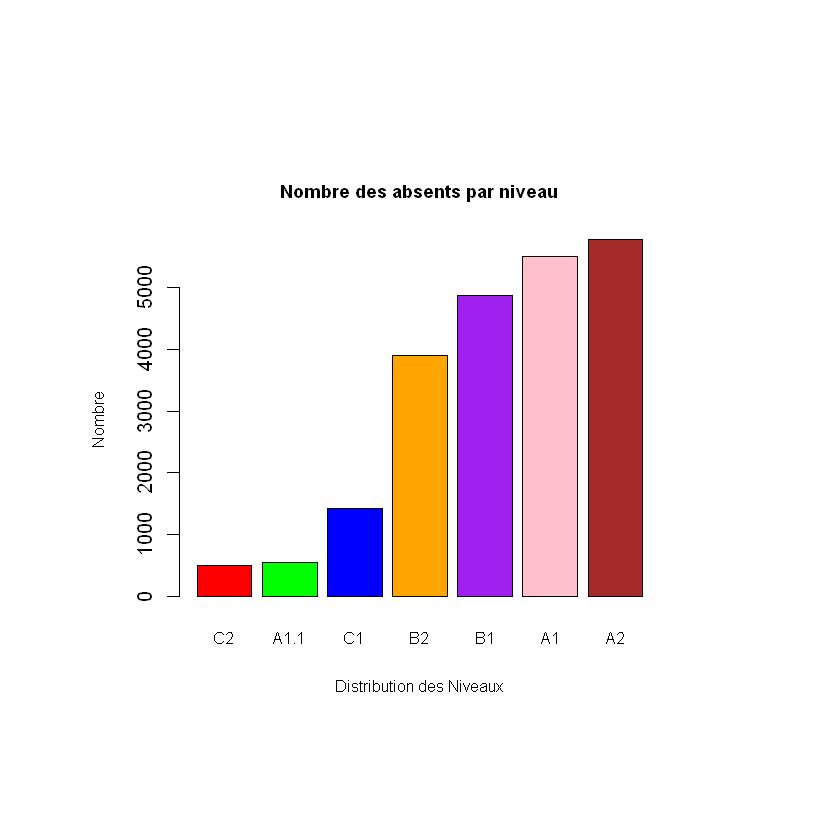

In [17]:
# Définir des couleurs personnalisées pour chaque niveau
colors <- c("red", "green", "blue", "orange", "purple", "pink", "brown")

# Ajuster la taille de la fenêtre graphique (largeur, hauteur)
par(pin = c(4, 3))  # 4 pouces de largeur, 3 pouces de hauteur

# Tracer un diagramme en barres avec des couleurs
barplot(absents_par_niveau$Absents, 
        names.arg = absents_par_niveau$Niveau,  # Étiquettes des barres
        col = colors,                           # Couleurs personnalisées
        main = "Nombre des absents par niveau", # Titre
        xlab = "Distribution des Niveaux",      # Titre de l'axe X
        ylab = "Nombre",                        # Titre de l'axe Y
        cex.main = 0.9,                         # Taille du titre
        cex.lab = 0.8,                          # Taille des étiquettes d'axes
        cex.names = 0.8)                        # Taille des étiquettes des barres

****Visualisation du Taux d'admission  par niveau****

Avec ce graphique, nous visualisons le taux d'admission par niveau. On observe que le niveau A1 a le taux d'admission le plus élevé, ce qui peut s’expliquer par sa facilité. En revanche, le niveau C2 a le taux d'admission le plus bas, probablement en raison de sa difficulté. Cette représentation met en évidence la corrélation entre la difficulté des niveaux et leurs taux d'admission.


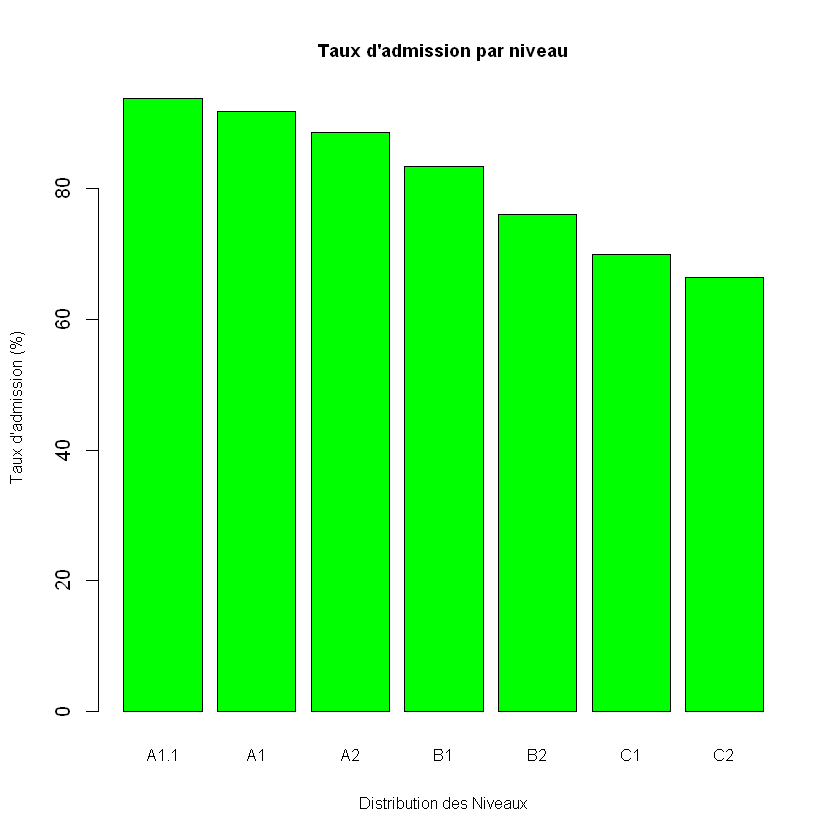

In [18]:
# Tracer un diagramme en barres avec une couleur unique (verte)
barplot(taux_admission_df$Taux_admission, 
        names.arg = taux_admission_df$Niveau,  # Étiquettes des barres
        col = "green",                         # Couleur des barres
        main = "Taux d'admission par niveau",  # Titre
        xlab = "Distribution des Niveaux",     # Titre de l'axe X
        ylab = "Taux d'admission (%)",         # Titre de l'axe Y
        cex.main = 0.9,                        # Taille du titre
        cex.lab = 0.8,                         # Taille des étiquettes d'axes
        cex.names = 0.8)                       # Taille des étiquettes des barres

***Visualisation du Taux d'échec  par niveau***

Ce graphique montre que le taux d'échec est le plus élevé pour le niveau C2, reflétant sa difficulté, et le plus bas pour le niveau A1, en raison de sa simplicité.

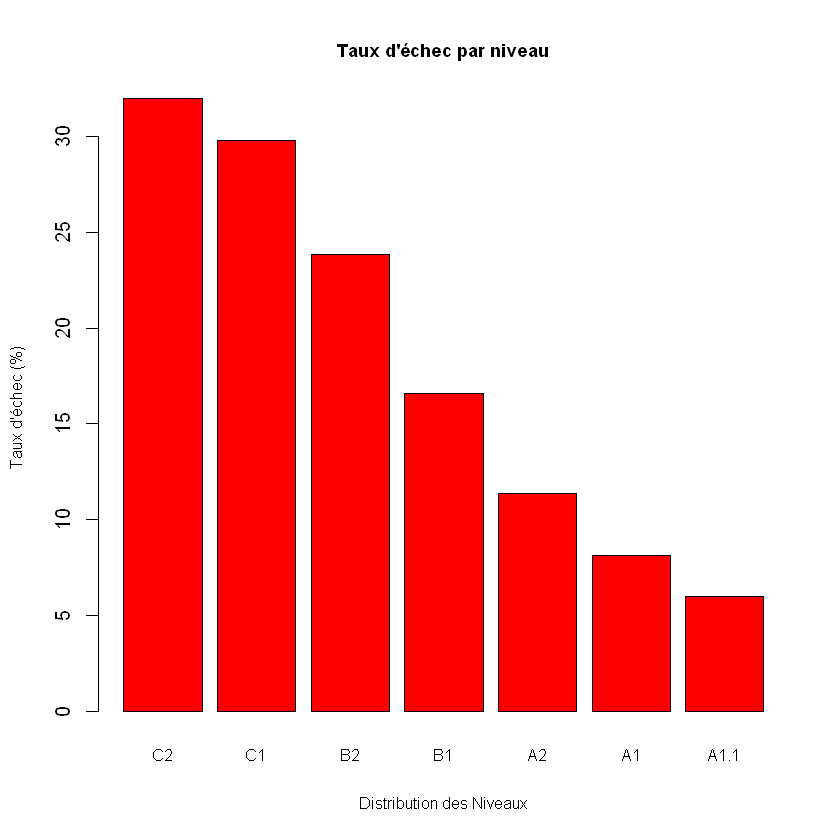

In [19]:
# Tracer un diagramme en barres avec une couleur unique (rouge)
barplot(taux_nonAdmis_df$Taux_Non_Admis, 
        names.arg = taux_nonAdmis_df$Niveau,  # Étiquettes des barres
        col = "red",                                  # Couleur des barres
        main = "Taux d'échec par niveau",             # Titre
        xlab = "Distribution des Niveaux",            # Titre de l'axe X
        ylab = "Taux d'échec (%)",                    # Titre de l'axe Y
        cex.main = 0.9,                               # Taille du titre
        cex.lab = 0.8,                                # Taille des étiquettes d'axes
        cex.names = 0.8)                              # Taille des étiquettes des barres

***Visualisation du Top 5 des pays avec le plus grand nombre d'admis sous forme de diagramme circulaire***

Ce code montre les 5 pays avec le plus d'admis à travers un tableau et un diagramme circulaire. Cela permet aux étudiants souhaitant passer le DELF de savoir où se trouvent le plus d'admis, ce qui peut indiquer une meilleure qualité d'éducation.

In [20]:
 # Étape 1 : Calculer le nombre total d'admis et d'inscrits par pays
admis_par_pays <- aggregate(cbind(Admis, Inscrits) ~ Pays, data, sum)

# Étape 2 : Trier les résultats par ordre décroissant (par nombre d'admis)
admis_par_pays <- admis_par_pays[order(-admis_par_pays$Admis), ]

# Étape 3 : Prendre les 5 premiers pays
Top_5_admis_par_pays <- head(admis_par_pays, 5)

# Afficher les résultats avec un titre en gras
cat("\033[1mTop 5 des pays par nombre d'admis :\033[0m\n")
print(Top_5_admis_par_pays)


Top 5 des pays par nombre d'admis :
        Pays Admis Inscrits
56    France 67080    92759
4  Allemagne 40732    45148
76    Italie 29966    31725
48   Espagne 28661    33149
61     Grèce 18709    21916


Le tableau présente les 5 pays avec le plus grand nombre d'admis au DELF. La France, en tête, compte un total de 67 080 admis, suivie de l'Allemagne avec 40 732 admis. Cette analyse permet de mieux comprendre les pays qui attirent le plus grand nombre de candidats et offre une indication utile aux étudiants pour identifier les pays où le DELF est le plus populaire, favorisant ainsi leur prise de décision quant à leur inscription et préparation aux examens.

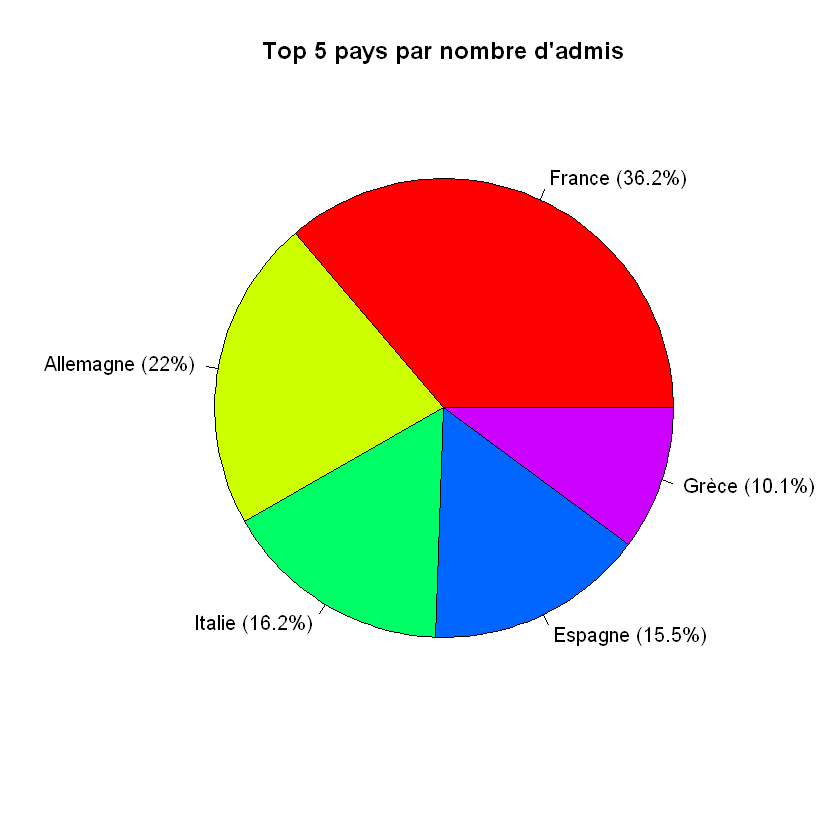

In [21]:
# Créer le dataframe avec les résultats donnés
Top_5_admis_par_pays <- data.frame(Pays = c("France", "Allemagne", "Italie", "Espagne", "Grèce"),
  Admis = c(67080, 40732, 29966, 28661, 18709))
# Calculer les pourcentages d'admis par rapport au total
pourcentages <- round(Top_5_admis_par_pays$Admis / sum(Top_5_admis_par_pays$Admis) * 100, 1)
# Créer les étiquettes avec les pourcentages
etiquettes <- paste(Top_5_admis_par_pays$Pays, " (", pourcentages, "%)", sep = "")
# Créer le camembert
pie(Top_5_admis_par_pays$Admis, 
    labels = etiquettes,
    main = "Top 5 pays par nombre d'admis",
    col = rainbow(length(Top_5_admis_par_pays$Pays)),
    cex.main = 1.2,  # Taille du titre
    cex.lab = 1,   # Taille des labels
    cex.axis = 0.9)  # Taille des axes


**Top Villes par Admis dans les Top 5 Pays**

Comme nous avons identifié les 5 meilleurs pays, nous continuons en trouvant la meilleure ville dans chaque pays parmi ces Top 5. Cela aide les étudiants à choisir la ville idéale pour passer le DELF. Les résultats sont présentés en tableau et graphique.

Top 5 des villes avec le plus grand nombre d'admis par pays :
         Pays   Ville Admis Inscrits
17      Grèce Athènes 13792    16027
153 Allemagne  Munich  9587    10618
138    France    Lyon  6917     9459
140   Espagne  Madrid  5689     6248
148    Italie   Milan  4263     4466


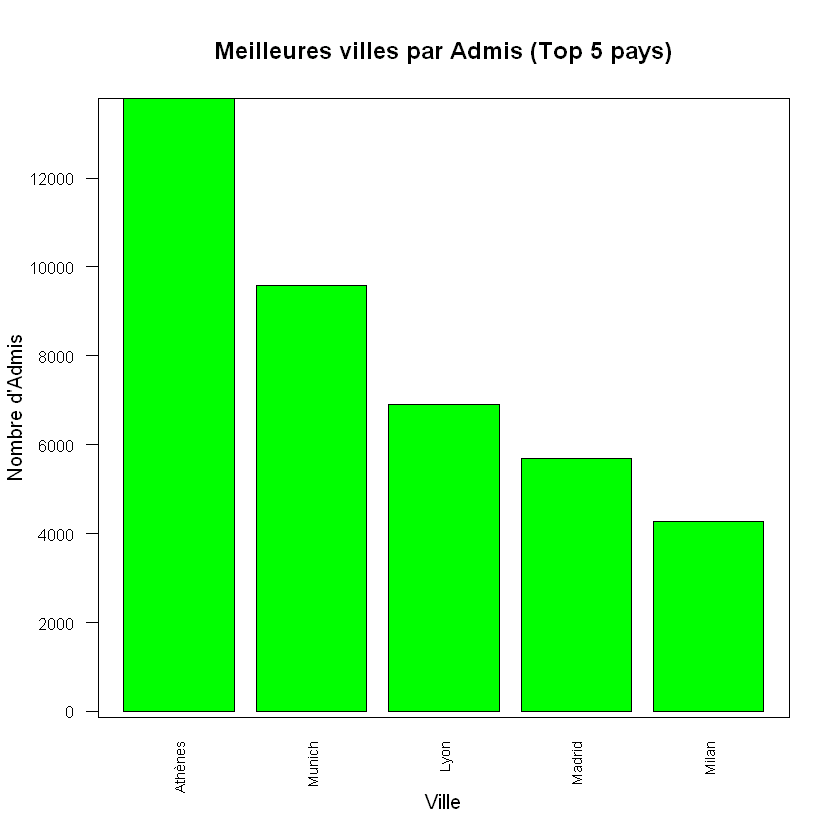

In [22]:
# Étape 1 : Filtrer les 5 pays ayant le plus grand nombre d'admis
top_5_pays <- aggregate(cbind(Admis, Inscrits) ~ Pays, data, sum)
top_5_pays <- top_5_pays[order(-top_5_pays$Admis), ]  # Trier par ordre décroissant
top_5_pays <- head(top_5_pays, 5)$Pays  # Garder les 5 premiers pays

# Étape 2 : Filtrer les données pour ces pays
data_top_5 <- data[data$Pays %in% top_5_pays, ]

# Étape 3 : Calculer le nombre d'admis et d'inscrits par ville et pays
admis_par_ville_pays <- aggregate(cbind(Admis, Inscrits) ~ Pays + Ville, data_top_5, sum)

# Étape 4 : Trier par nombre d'admis décroissant
admis_par_ville_pays <- admis_par_ville_pays[order(-admis_par_ville_pays$Admis), ]

# Étape 5 : Sélectionner la meilleure ville pour chaque pays
top_5_villes <- admis_par_ville_pays[!duplicated(admis_par_ville_pays$Pays), ]

# Afficher les résultats
cat("\033[1mTop 5 des villes avec le plus grand nombre d'admis par pays :\033[0m\n")
print(top_5_villes)

# Création du graphique en barres avec uniquement les noms des villes
barplot(top_5_villes$Admis, names.arg = top_5_villes$Ville,  col = "green",  main = "Meilleures villes par Admis (Top 5 pays)",  xlab = "Ville", 
        ylab = "Nombre d'Admis", las = 2,  
        cex.names = 0.7,  # Réduction de la taille des noms
        cex.axis = 0.8,   # Réduction de la taille des axes
        border = "black")  # Ajout de bordures aux barres
# Encadrement du graphique
box()


## Top 5 villes de France
L'analyse des 5 meilleures villes de France par nombre d'admis a été réalisée dans le but de fournir aux étudiants une vue d'ensemble des villes offrant les meilleures opportunités d'admission. Cette analyse permet de mieux orienter les candidats en identifiant les villes les plus performantes, et ainsi, les aider à choisir un lieu d'étude optimal en fonction du nombre d'admis. Le graphique en barres et le tableau des résultats permettent une visualisation claire des villes les plus attractives, offrant ainsi une aide précieuse pour les décisions académiques des étudiants.

Top 5 villes de France par nombre d'admis :
           Ville Admis Inscrits
57          Lyon  6917     9459
60     Marseille  3986     5339
44 Gennevilliers  3559     5648
5         Amiens  3298     4133
96   Saint Denis  2868     4041


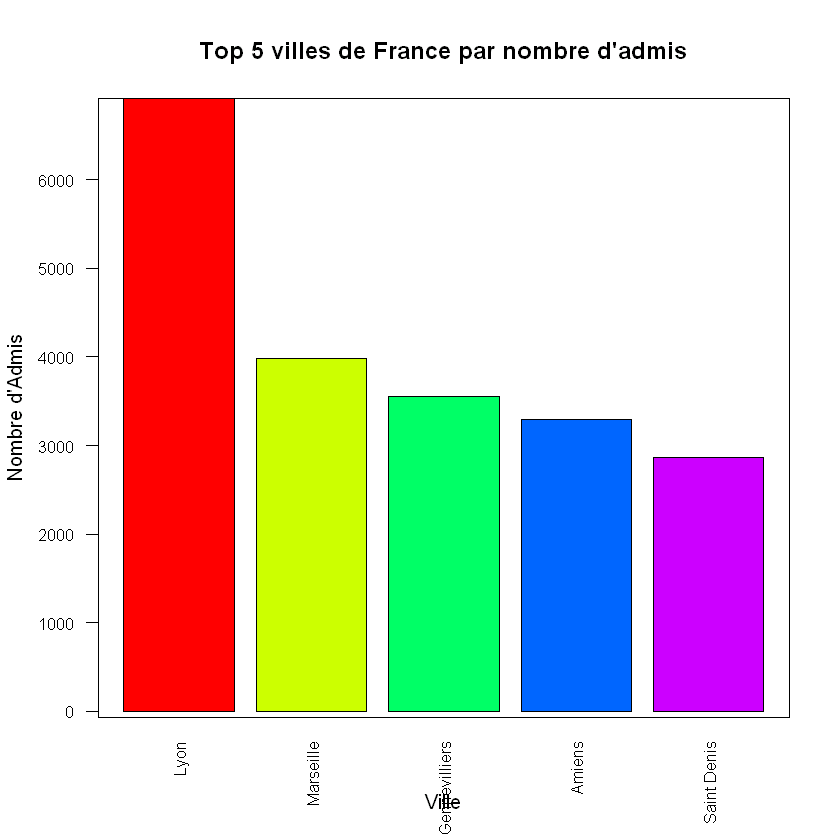

In [23]:
# Étape 1 : Filtrer les données pour la France
data_france <- data[data$Pays == "France", ]

# Étape 2 : Calculer le nombre d'admis et d'inscrits par ville en France
admis_par_ville_france <- aggregate(cbind(Admis, Inscrits) ~ Ville, data_france, sum)

# Étape 3 : Trier les villes par nombre d'admis décroissant
admis_par_ville_france <- admis_par_ville_france[order(-admis_par_ville_france$Admis), ]

# Étape 4 : Sélectionner les 5 meilleures villes
top_5_villes_france <- head(admis_par_ville_france, 5)

# Afficher les résultats sous forme de tableau
cat("\033[1mTop 5 villes de France par nombre d'admis :\033[0m\n")
print(top_5_villes_france)

# Créer un graphique en barres pour visualiser les résultats
barplot(top_5_villes_france$Admis, 
        names.arg = top_5_villes_france$Ville, 
        col = rainbow(length(top_5_villes_france$Ville)), 
        main = "Top 5 villes de France par nombre d'admis", 
        xlab = "Ville", 
        ylab = "Nombre d'Admis", 
        las = 2,  # Rotation des labels de l'axe x
        cex.names = 0.8,  # Taille des labels
        cex.axis = 0.8,   # Taille des axes
        border = "black")  # Bordures des barres

# Encadrement du graphique
box()

## Top 2 centres à Lyon par nombre d'admis
Cette analyse permet de déterminer les deux meilleurs centres à Lyon en fonction du nombre d'admis, afin d'aider les étudiants à identifier les établissements les plus performants dans cette ville.

In [24]:
# Étape 1 : Filtrer les données pour la ville de Lyon
data_lyon <- data[data$Ville == "Lyon", ]

# Étape 2 : Calculer le nombre d'admis et d'inscrits par centre à Lyon
admis_par_centre_lyon <- aggregate(cbind(Admis, Inscrits) ~ Centre, data_lyon, sum)
# Étape 3 : Trier les centres par nombre d'admis décroissant
admis_par_centre_lyon <- admis_par_centre_lyon[order(-admis_par_centre_lyon$Admis), ]

# Étape 4 : Sélectionner les 2 meilleurs centres
top_2_centres_lyon <- head(admis_par_centre_lyon, 2)

# Étape 5 : Afficher les résultats sous forme de tableau
cat("\033[1mTop 2 centres à Lyon :\033[0m\n")
cat(sprintf("%-30s | %-10s | %-10s\n", "Centre", "Admis", "Inscrits"))
for (i in 1:nrow(top_2_centres_lyon)) {cat(sprintf("%-30s | %-10d | %-10d\n", top_2_centres_lyon$Centre[i], 
              top_2_centres_lyon$Admis[i], 
              top_2_centres_lyon$Inscrits[i]))}


Top 2 centres à Lyon :
Centre                         | Admis      | Inscrits  
Rectorat de l'académie de Lyon - Division des examens et concours | 1971       | 2490      
REN Formation                  | 1589       | 2094      


Les deux centres les plus performants à Lyon sont le "Rectorat de l'académie de Lyon" et "REN Formation", avec un nombre d'admis élevé mais un écart notable entre les inscrits et les admis. Cela indique qu'il existe un potentiel d'amélioration dans la préparation des étudiants.

Cette analyse aide les étudiants à choisir les centres les plus efficaces pour maximiser leurs chances d'admission en mettant en lumière les meilleurs et les moins performants.


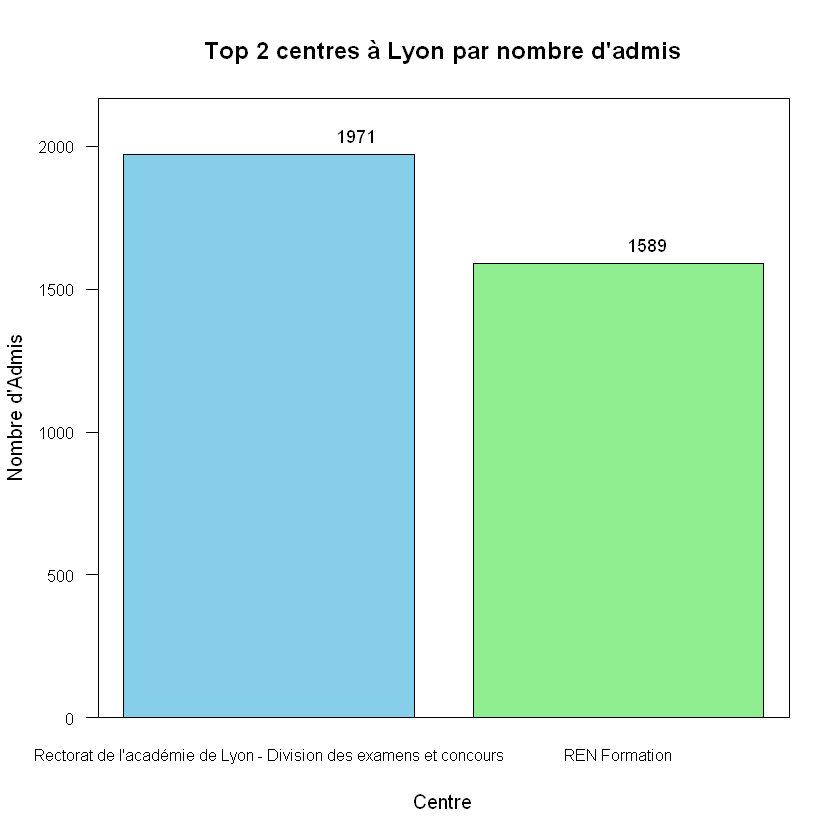

In [25]:
# Créer un graphique en barres
barplot(top_2_centres_lyon$Admis, names.arg = top_2_centres_lyon$Centre, col = c("skyblue", "lightgreen"),  main = "Top 2 centres à Lyon par nombre d'admis", xlab = "Centre", 
        ylab = "Nombre d'Admis", ylim = c(0, max(top_2_centres_lyon$Admis) * 1.1),  
        las = 1,  
        cex.names = 0.8,  
        cex.axis = 0.8,   border = "black")  
# Ajouter des valeurs au-dessus des barres
text(x = 1:2, y = top_2_centres_lyon$Admis, labels = top_2_centres_lyon$Admis, pos = 3,  col = "black", cex = 0.9)
# Encadrement du graphique
box()

## Top Centres dans les 5 meilleures villes de France,
Cette analyse permet aux étudiants de choisir les meilleurs centres dans les 5 villes les plus performantes, en se basant sur le nombre d'admis, pour les aider à prendre des décisions éclairées sur leur parcours académique.

In [26]:

# Étape 1 : Filtrer les données pour les 5 meilleures villes de France
data_top_5_villes_france <- data[data$Ville %in% top_5_villes_france$Ville, ]

# Étape 2 : Calculer le nombre d'admis par centre dans ces villes
admis_par_centre_france <- aggregate(Admis ~ Ville + Centre, data_top_5_villes_france, sum)

# Étape 3 : Trier les centres par nombre d'admis décroissant
admis_par_centre_france <- admis_par_centre_france[order(-admis_par_centre_france$Admis), ]

# Étape 4 : Sélectionner le meilleur centre pour chaque ville
meilleur_centre_par_ville <- do.call(rbind, lapply(split(admis_par_centre_france, admis_par_centre_france$Ville), function(x) head(x, 1)))

# Étape 5 : Améliorer la présentation du tableau
# Créer un tableau bien formaté
tableau_organise <- data.frame(Ville = meilleur_centre_par_ville$Ville,Centre = meilleur_centre_par_ville$Centre,Admis = meilleur_centre_par_ville$Admis)

# Afficher le tableau avec un alignement propre 
cat("\033[1mMeilleur centre dans chaque ville (Top 5 villes de France) :\033[0m\n")
cat("------------------------------------------------------------\n")
cat(sprintf("%-15s | %-30s | %-10s\n", "Ville", "Centre", "Admis"))
cat("------------------------------------------------------------\n")
for (i in 1:nrow(tableau_organise)) {cat(sprintf("%-15s | %-30s | %-10d\n", tableau_organise$Ville[i], tableau_organise$Centre[i], tableau_organise$Admis[i]))}
cat("------------------------------------------------------------\n")

Meilleur centre dans chaque ville (Top 5 villes de France) :
------------------------------------------------------------
Ville           | Centre                         | Admis     
------------------------------------------------------------
Amiens          | RECTORAT                       | 3096      
Gennevilliers   | PROSODIA                       | 3559      
Lyon            | Rectorat de l'académie de Lyon - Division des examens et concours | 1971      
Marseille       | Direction académique des Services de l'Education nationale des Bouches du-Rhône | 2253      
Saint Denis     | GRETA 93 SEINE ST DENIS        | 1573      
------------------------------------------------------------


## Top 5 des pays avec le moins d'admis
Cette analyse permet à la France de mieux comprendre les pays avec le moins d'admis, afin de cibler ces marchés pour attirer davantage d'étudiants internationaux. En identifiant ces pays, la France peut adapter ses stratégies de recrutement et offrir des opportunités d'admission pour améliorer l'attractivité des études françaises.

Top 5 des pays avec le moins d'Admis :
                    Pays Admis Inscrits
115            Palestine     2        2
46              Equateur     3        4
62               Grenade     3        4
57                 Gabon     4        5
134 Saint-Kitts-et-Nevis     4        4


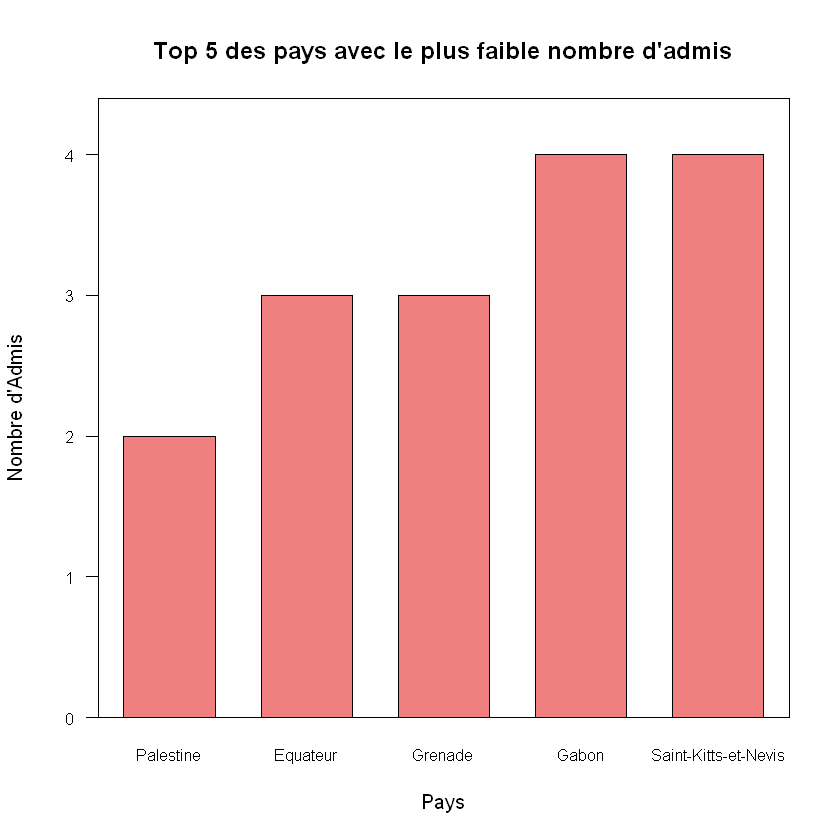

In [27]:
# Étape 1 : Calculer le nombre total d'admis et d'inscrits par pays
admis_par_pays <- aggregate(cbind(Admis, Inscrits) ~ Pays, data, sum)

# Étape 2 : Trier les pays par nombre d'admis (croissant)
admis_par_pays <- admis_par_pays[order(admis_par_pays$Admis), ]

# Étape 3 : Sélectionner les 5 pays avec le plus faible nombre d'admis
top_5_pays_faible_admis <- head(admis_par_pays, 5)

# Afficher le Top 5 des pays avec le moins d'admis
cat("\033[1mTop 5 des pays avec le moins d'Admis :\033[0m\n")
print(top_5_pays_faible_admis)


# Étape 4 : Créer un graphique en barres
barplot(top_5_pays_faible_admis$Admis, names.arg = top_5_pays_faible_admis$Pays, col = "lightcoral",  
        main = "Top 5 des pays avec le plus faible nombre d'admis", xlab = "Pays", ylab = "Nombre d'Admis", ylim = c(0, max(top_5_pays_faible_admis$Admis) * 1.1),  
        las = 1,  cex.names = 0.8,  # Taille des labels des pays
        cex.axis = 0.8,   # Taille des axes
        border = "black", space = 0.5)  # Espacement entre les barres
# Encadrement du graphique
box()


Les pays ayant le moins d'admis, tels que la Palestine, l'Équateur, la Grenade, le Gabon et Saint-Kitts-et-Nevis, montrent des faibles taux d'admission par rapport aux inscrits. Pour améliorer cette situation, il est crucial de renforcer les programmes d'accompagnement et de soutien à l'orientation des étudiants, d'améliorer la préparation aux examens et de mettre en place des initiatives pour mieux orienter les candidats afin qu'ils puissent réussir les processus d'admission. De plus, des efforts doivent être faits pour accroître l'accès à la formation, notamment en améliorant les infrastructures éducatives et en sensibilisant davantage les étudiants aux opportunités académiques

## Conclusion :

L’analyse des données du DELF met en lumière les pays avec un faible nombre d'admis, tels que la Palestine, l'Équateur, la Grenade, le Gabon et Saint-Kitts-et-Nevis. Bien que le nombre d'inscrits dans ces pays soit relativement bas, le taux d'admission reste faible. Cette situation nécessite une attention particulière, notamment par la mise en place de programmes de préparation adaptés et d'un meilleur soutien à l'orientation des candidats. En renforçant l'accompagnement et en ciblant ces pays avec des stratégies de recrutement adaptées, la France pourrait améliorer les taux d'admission et rendre le DELF plus accessible à un plus grand nombre d'étudiants internationaux.

L'analyse des données montre des pays et villes performants dans les inscriptions et les admissions au DELF. En tête, la France, l'Allemagne, l'Italie, l'Espagne et la Grèce se distinguent par un nombre élevé d'admis. Les villes comme Athènes, Munich, Lyon, Madrid et Milan sont des destinations populaires, attirant un grand nombre d'étudiants, ce qui met en évidence leur rôle clé dans la diffusion du DELF à l'international.

L'analyse des centres par ville, en particulier à Lyon, révèle des établissements performants comme le Rectorat de l'académie de Lyon, qui se distingue par un nombre élevé d'admissions. Cette information est cruciale pour orienter les futurs candidats vers des centres offrant de meilleures chances de réussite.

En somme, ces analyses permettent non seulement d'identifier les villes et centres les plus attractifs mais aussi de fournir aux candidats des informations stratégiques pour leur orientation, améliorant ainsi leur expérience dans le cadre de la préparation au DELF.

**Réalisé par :**

Saleh BA-ZIGHIFAN

Abdulaziz Al-KHULAQI

Abdulrahman BA GUBAIR
